<a href="https://colab.research.google.com/github/ddaddaradda/DL/blob/main/k_means_cluster_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
with open('/content/drive/MyDrive/tmp/별떠라가자_공유폴더/AI파트/데이터/벡터/vector_dict_0421.pkl','rb') as f:
  mydict = pickle.load(f)


In [ ]:
id_list = list(mydict.keys())[:-4]
id_list


['D788034C',
 '1DBEBE62',
 'B95FBB89',
 '483AA738',
 'A77E8CE3',
 '912BB33B',
 '88826FAB',
 'F0A475A1',
 'DB7B0571',
 '4E34891D',
 '570AA81D',
 '649508BF',
 '8C7E7A17',
 'D30C299A',
 '8E640374',
 'F0A475A1_2',
 '9EECBC9A',
 'A50AF373',
 'F257DB06']

In [ ]:
df = mydict['F257DB06']
df.columns = ['DATE','0','1','2','3','4','5','6','7']
df

,DATE,0,1,2,3,4,5,6,7
0,2021-11-17 17:33:42,0.000923,0.002963,0.002553,0.160005,0.000062,0.892718,0.565475,0.001348
1,2021-11-17 17:33:43,0.016948,0.000878,0.000066,0.133410,0.005582,0.031719,0.030771,0.002416
2,2021-11-17 17:33:44,0.044535,0.001213,0.000060,0.084237,0.009142,0.033362,0.030305,0.004298
3,2021-11-17 17:33:45,0.140223,0.001650,0.000065,0.061606,0.023517,0.037162,0.033183,0.007123
4,2021-11-17 17:33:46,0.036529,0.001395,0.000067,0.085345,0.007778,0.048439,0.036692,0.003410
...,...,...,...,...,...,...,...,...,...
718,2021-11-17 17:46:41,0.057448,0.001689,0.000070,0.079439,0.010539,0.052714,0.039905,0.004037
719,2021-11-17 17:46:42,0.057815,0.001603,0.000069,0.079451,0.010530,0.048433,0.038144,0.004177
720,2021-11-17 17:46:43,0.060785,0.001497,0.000066,0.077506,0.011072,0.041750,0.034849,0.004532
721,2021-11-17 17:46:44,0.059896,0.001556,0.000068,0.078155,0.010878,0.045338,0.036629,0.004357


In [ ]:
temp = pd.DataFrame()
for id in id_list:
    df = mydict[id]
    df.columns = ['DATE','0','1','2','3','4','5','6','7']
    temp = pd.concat([temp,df])

temp.reset_index(drop = True)

df = pd.DataFrame(temp)

In [ ]:
df = pd.DataFrame(temp)

In [ ]:
df.shape

(281501, 9)

In [ ]:
df.head()

,DATE,0,1,2,3,4,5,6,7
0,2021-11-28 00:00:00,0.981262,0.990319,0.979536,0.328138,0.985659,0.794406,0.967414,0.900350
1,2021-11-28 00:00:01,0.962457,0.998730,0.998241,0.975713,0.868509,0.205135,0.993087,0.139415
2,2021-11-28 00:00:02,0.986374,0.998717,0.997116,0.925132,0.966387,0.803887,0.993642,0.401863
3,2021-11-28 00:00:03,0.974020,0.998734,0.998220,0.973949,0.870613,0.340489,0.994713,0.124057
4,2021-11-28 00:00:04,0.982181,0.998724,0.997959,0.968855,0.912446,0.521101,0.995326,0.157700


# k-means

## KElbowVisualizer

In [ ]:
k6_df = df.drop(columns = ['DATE'])

In [ ]:
from sklearn.cluster import KMeans

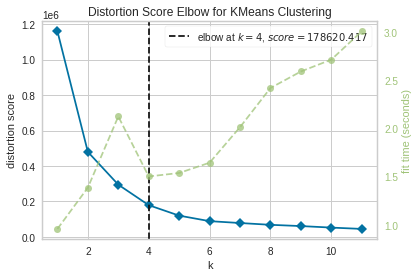

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(k6_df) 
visualizer.show() 

## K = 6

In [ ]:
from sklearn.cluster import KMeans

k = 6

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 데이터 학습
model.fit(k6_df)


# 클러스터링 결과 각 데이터가 어디 그룹에 속하는지 저장
predicted = model.predict(k6_df)

In [ ]:
k6_df['cluster'] = 0 #컬럼 생성 + integer 선언 
k6_df['cluster'] = predicted

In [ ]:
k6_df

,0,1,2,3,4,5,6,7,cluster
0,0.981262,0.990319,0.979536,0.328138,0.985659,0.794406,0.967414,0.900350,0
1,0.962457,0.998730,0.998241,0.975713,0.868509,0.205135,0.993087,0.139415,5
2,0.986374,0.998717,0.997116,0.925132,0.966387,0.803887,0.993642,0.401863,5
3,0.974020,0.998734,0.998220,0.973949,0.870613,0.340489,0.994713,0.124057,5
4,0.982181,0.998724,0.997959,0.968855,0.912446,0.521101,0.995326,0.157700,5
...,...,...,...,...,...,...,...,...,...
718,0.057448,0.001689,0.000070,0.079439,0.010539,0.052714,0.039905,0.004037,3
719,0.057815,0.001603,0.000069,0.079451,0.010530,0.048433,0.038144,0.004177,3
720,0.060785,0.001497,0.000066,0.077506,0.011072,0.041750,0.034849,0.004532,3
721,0.059896,0.001556,0.000068,0.078155,0.010878,0.045338,0.036629,0.004357,3


In [ ]:
k6_df['cluster'].value_counts()

0    91367
2    74036
5    35829
1    35792
3    24613
4    19864
Name: cluster, dtype: int64

굵은 텍스트# 전체 데이터셋 k 분포 확인

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


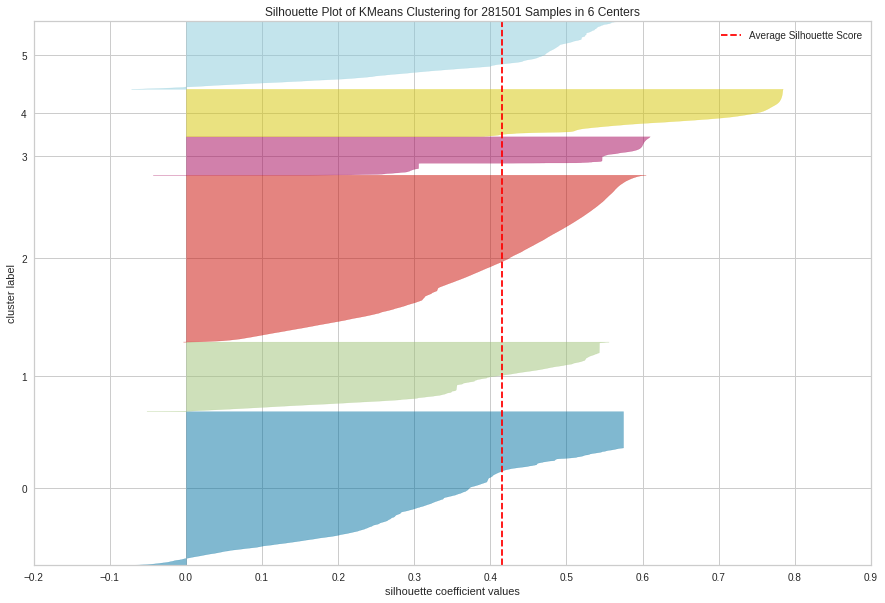

In [ ]:
model = KMeans(6, random_state=42)
model.fit(df.drop(columns = ['DATE']))
visualizer = SilhouetteVisualizer(model, size=(1080, 720),colors='yellowbrick')

visualizer.fit(df.drop(columns = ['DATE']))        # Fit the data to the visualizer
visualizer.show()

##Intercluster Distance Maps

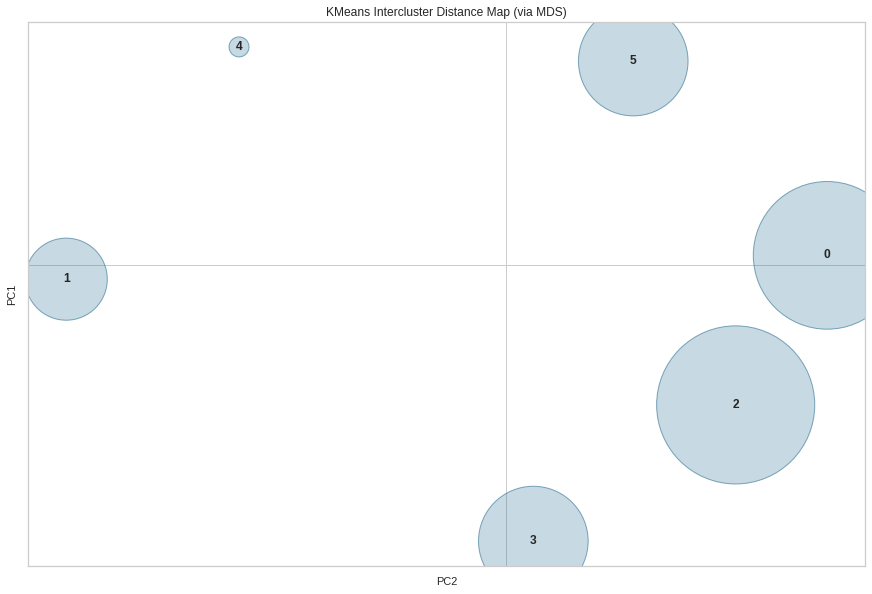

In [ ]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(6)
visualizer = InterclusterDistance(model,size=(1080, 720),legend=0)
visualizer.fit(k6_df) 
visualizer.show()


## test fit

In [ ]:
test_id = list(mydict.keys())[-4:-1]
test_id

['20211203', '20211204', '20211205']

In [ ]:
test_temp = pd.DataFrame()
for id in test_id:
    df = mydict[id]
    df.columns = ['DATE','0','1','2','3','4','5','6','7']
    test_temp = pd.concat([test_temp,df])

In [ ]:
test_temp

,DATE,0,1,2,3,4,5,6,7
0,2021-12-03 08:56:13,0.173659,0.001658,0.063130,0.654376,0.907993,0.007730,0.001650,0.990961
1,2021-12-03 08:56:14,0.198067,0.001685,0.062289,0.646822,0.912724,0.007610,0.001622,0.990849
2,2021-12-03 08:56:15,0.195565,0.001756,0.065871,0.651701,0.913653,0.007435,0.001656,0.991099
3,2021-12-03 08:56:16,0.228768,0.001877,0.067001,0.648844,0.921188,0.007074,0.001635,0.991188
4,2021-12-03 08:56:17,0.193885,0.001713,0.064120,0.649567,0.912471,0.007554,0.001643,0.990962
...,...,...,...,...,...,...,...,...,...
27544,2021-12-05 19:35:13,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963
27545,2021-12-05 19:35:14,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963
27546,2021-12-05 19:35:15,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963
27547,2021-12-05 19:35:16,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963


In [ ]:
test_df = test_temp.drop(columns = ['DATE'])

# 클러스터링 결과 각 데이터가 어디 그룹에 속하는지 저장
predicted = model.predict(test_df)

In [ ]:
test_df['cluster'] = predicted

In [ ]:
test_df

,0,1,2,3,4,5,6,7,cluster
0,0.173659,0.001658,0.063130,0.654376,0.907993,0.007730,0.001650,0.990961,1
1,0.198067,0.001685,0.062289,0.646822,0.912724,0.007610,0.001622,0.990849,1
2,0.195565,0.001756,0.065871,0.651701,0.913653,0.007435,0.001656,0.991099,1
3,0.228768,0.001877,0.067001,0.648844,0.921188,0.007074,0.001635,0.991188,1
4,0.193885,0.001713,0.064120,0.649567,0.912471,0.007554,0.001643,0.990962,1
...,...,...,...,...,...,...,...,...,...
27544,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963,1
27545,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963,1
27546,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963,1
27547,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963,1


In [ ]:
test_df['cluster'].value_counts()

1    84419
0     8717
2       45
5        8
4        1
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


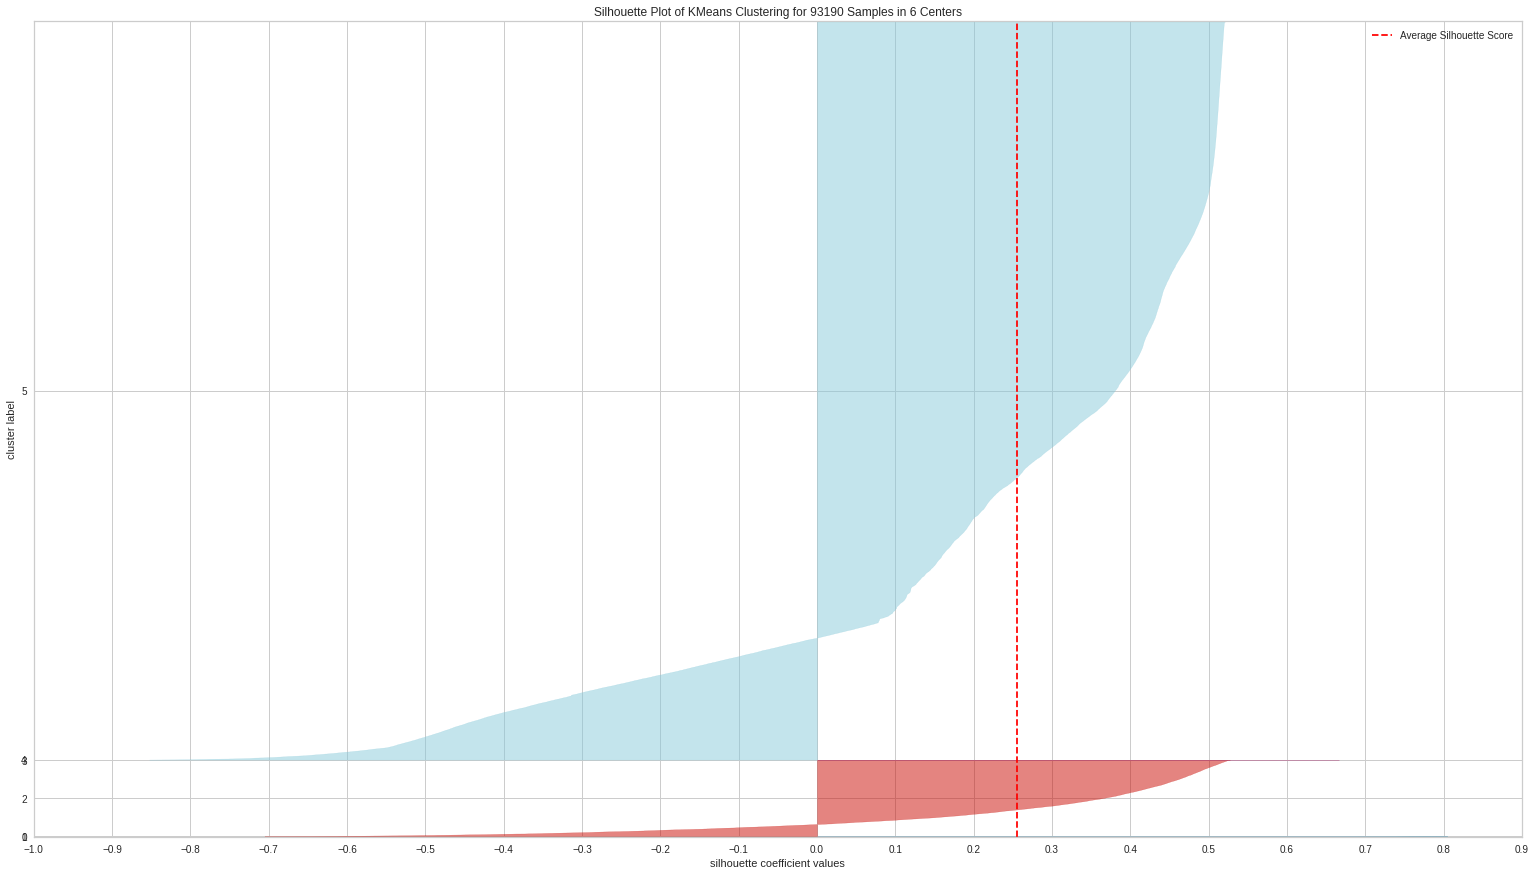

In [ ]:
visualizer = SilhouetteVisualizer(model, size=(1920,1080),colors='yellowbrick')

visualizer.fit(test_temp.drop(columns = ['DATE']))        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


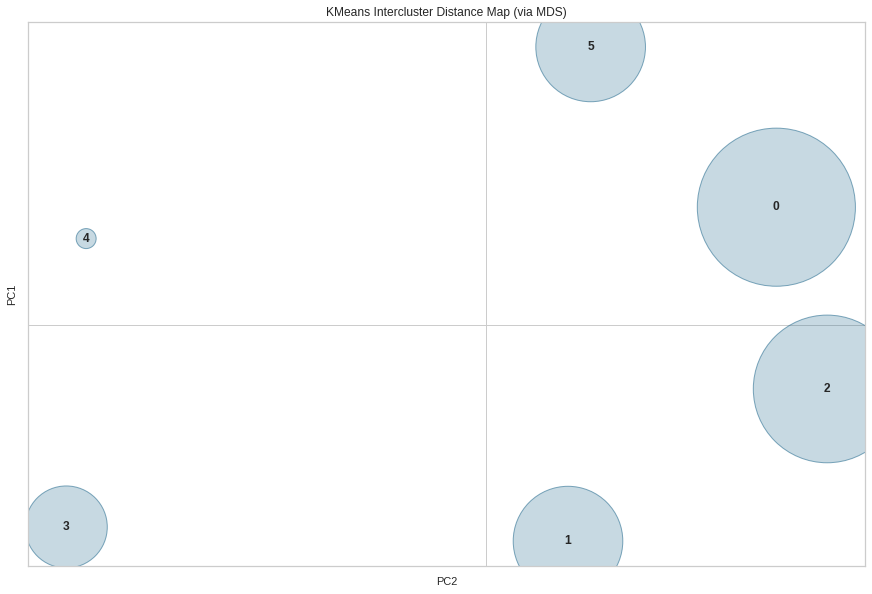

In [ ]:

visualizer = InterclusterDistance(model,size=(1080, 720),legend = 0)
visualizer.fit(test_temp.drop(columns = ['DATE'])) 
visualizer.show()

# k-means

## KElbowVisualizer

In [ ]:
temp = pd.DataFrame()
for id in id_list:
    df = mydict[id]
    df.columns = ['DATE','0','1','2','3','4','5','6','7']
    temp = pd.concat([temp,df])

temp.reset_index(drop = True)

df = pd.DataFrame(temp)

In [ ]:
k10_df = df.drop(columns = ['DATE'])

In [ ]:
k10_df

,0,1,2,3,4,5,6,7
0,0.981262,0.990319,0.979536,0.328138,0.985659,0.794406,0.967414,0.900350
1,0.962457,0.998730,0.998241,0.975713,0.868509,0.205135,0.993087,0.139415
2,0.986374,0.998717,0.997116,0.925132,0.966387,0.803887,0.993642,0.401863
3,0.974020,0.998734,0.998220,0.973949,0.870613,0.340489,0.994713,0.124057
4,0.982181,0.998724,0.997959,0.968855,0.912446,0.521101,0.995326,0.157700
...,...,...,...,...,...,...,...,...
718,0.057448,0.001689,0.000070,0.079439,0.010539,0.052714,0.039905,0.004037
719,0.057815,0.001603,0.000069,0.079451,0.010530,0.048433,0.038144,0.004177
720,0.060785,0.001497,0.000066,0.077506,0.011072,0.041750,0.034849,0.004532
721,0.059896,0.001556,0.000068,0.078155,0.010878,0.045338,0.036629,0.004357


## K = 10

In [ ]:
from sklearn.cluster import KMeans

k = 10

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 데이터 학습
model.fit(k10_df)


# 클러스터링 결과 각 데이터가 어디 그룹에 속하는지 저장
predicted = model.predict(k10_df)

In [ ]:
k10_df['cluster'] = 0 #컬럼 생성 + integer 선언 
k10_df['cluster'] = predicted

In [ ]:
k10_df

,0,1,2,3,4,5,6,7,cluster
0,0.981262,0.990319,0.979536,0.328138,0.985659,0.794406,0.967414,0.900350,3
1,0.962457,0.998730,0.998241,0.975713,0.868509,0.205135,0.993087,0.139415,1
2,0.986374,0.998717,0.997116,0.925132,0.966387,0.803887,0.993642,0.401863,1
3,0.974020,0.998734,0.998220,0.973949,0.870613,0.340489,0.994713,0.124057,1
4,0.982181,0.998724,0.997959,0.968855,0.912446,0.521101,0.995326,0.157700,1
...,...,...,...,...,...,...,...,...,...
718,0.057448,0.001689,0.000070,0.079439,0.010539,0.052714,0.039905,0.004037,2
719,0.057815,0.001603,0.000069,0.079451,0.010530,0.048433,0.038144,0.004177,2
720,0.060785,0.001497,0.000066,0.077506,0.011072,0.041750,0.034849,0.004532,2
721,0.059896,0.001556,0.000068,0.078155,0.010878,0.045338,0.036629,0.004357,2


In [ ]:
k10_df['cluster'].value_counts()

3    54955
9    53449
6    44178
1    31160
2    24582
4    21712
8    16885
7    13714
5    13649
0     7217
Name: cluster, dtype: int64

## 전체 데이터셋 k 분포 확인

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

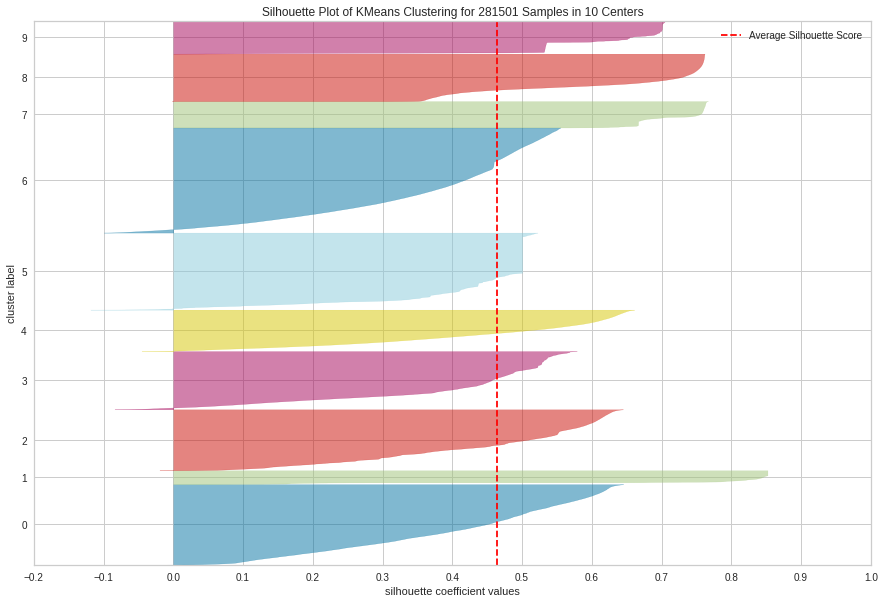

In [ ]:
model = KMeans(10, random_state=42)

visualizer = SilhouetteVisualizer(model, size=(1080, 720),colors='yellowbrick')

visualizer.fit(df.drop(columns = ['DATE']))        # Fit the data to the visualizer
visualizer.show()

##Intercluster Distance Maps

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


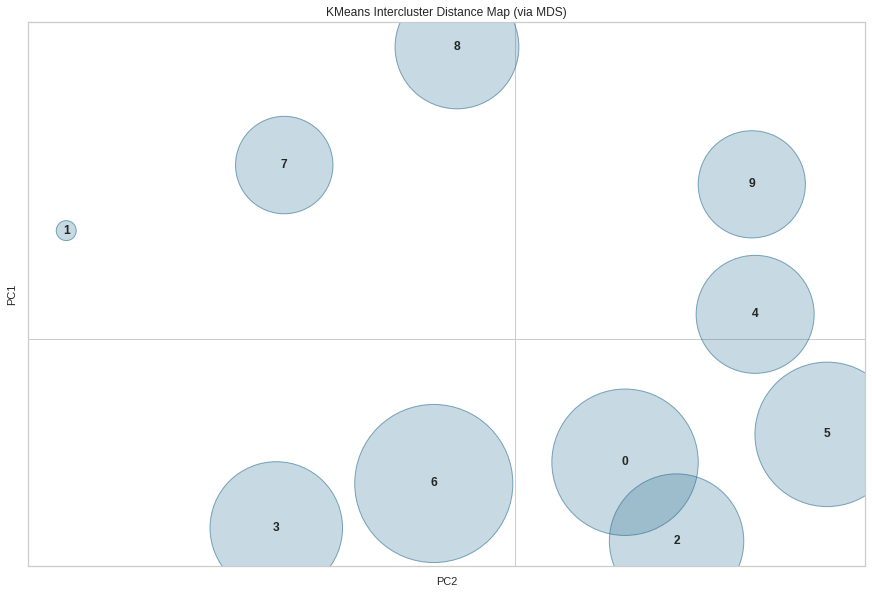

In [ ]:
from yellowbrick.cluster import InterclusterDistance

visualizer = InterclusterDistance(model,size=(1080, 720),legend=0)
visualizer.fit(k10_df) 
visualizer.show()


## test fit

In [ ]:
test_id = list(mydict.keys())[-4:-1]
test_id

['20211203', '20211204', '20211205']

In [ ]:
test_temp = pd.DataFrame()
for id in test_id:
    df = mydict[id]
    df.columns = ['DATE','0','1','2','3','4','5','6','7']
    test_temp = pd.concat([test_temp,df])

In [ ]:
test_temp

,DATE,0,1,2,3,4,5,6,7
0,2021-12-03 08:56:13,0.173659,0.001658,0.063130,0.654376,0.907993,0.007730,0.001650,0.990961
1,2021-12-03 08:56:14,0.198067,0.001685,0.062289,0.646822,0.912724,0.007610,0.001622,0.990849
2,2021-12-03 08:56:15,0.195565,0.001756,0.065871,0.651701,0.913653,0.007435,0.001656,0.991099
3,2021-12-03 08:56:16,0.228768,0.001877,0.067001,0.648844,0.921188,0.007074,0.001635,0.991188
4,2021-12-03 08:56:17,0.193885,0.001713,0.064120,0.649567,0.912471,0.007554,0.001643,0.990962
...,...,...,...,...,...,...,...,...,...
27544,2021-12-05 19:35:13,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963
27545,2021-12-05 19:35:14,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963
27546,2021-12-05 19:35:15,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963
27547,2021-12-05 19:35:16,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963


In [ ]:
test_df = test_temp.drop(columns = ['DATE'])

# 클러스터링 결과 각 데이터가 어디 그룹에 속하는지 저장
predicted = model.predict(test_df)

In [ ]:
test_df['cluster'] = predicted

In [ ]:
test_df

,0,1,2,3,4,5,6,7,cluster
0,0.173659,0.001658,0.063130,0.654376,0.907993,0.007730,0.001650,0.990961,9
1,0.198067,0.001685,0.062289,0.646822,0.912724,0.007610,0.001622,0.990849,9
2,0.195565,0.001756,0.065871,0.651701,0.913653,0.007435,0.001656,0.991099,9
3,0.228768,0.001877,0.067001,0.648844,0.921188,0.007074,0.001635,0.991188,9
4,0.193885,0.001713,0.064120,0.649567,0.912471,0.007554,0.001643,0.990962,9
...,...,...,...,...,...,...,...,...,...
27544,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963,9
27545,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963,9
27546,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963,9
27547,0.973141,0.045963,0.008106,0.169919,0.996330,0.028713,0.002163,0.978963,9


In [ ]:
test_df['cluster'].value_counts()

4    62970
9    24284
0     4488
6     1436
5        8
3        3
7        1
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


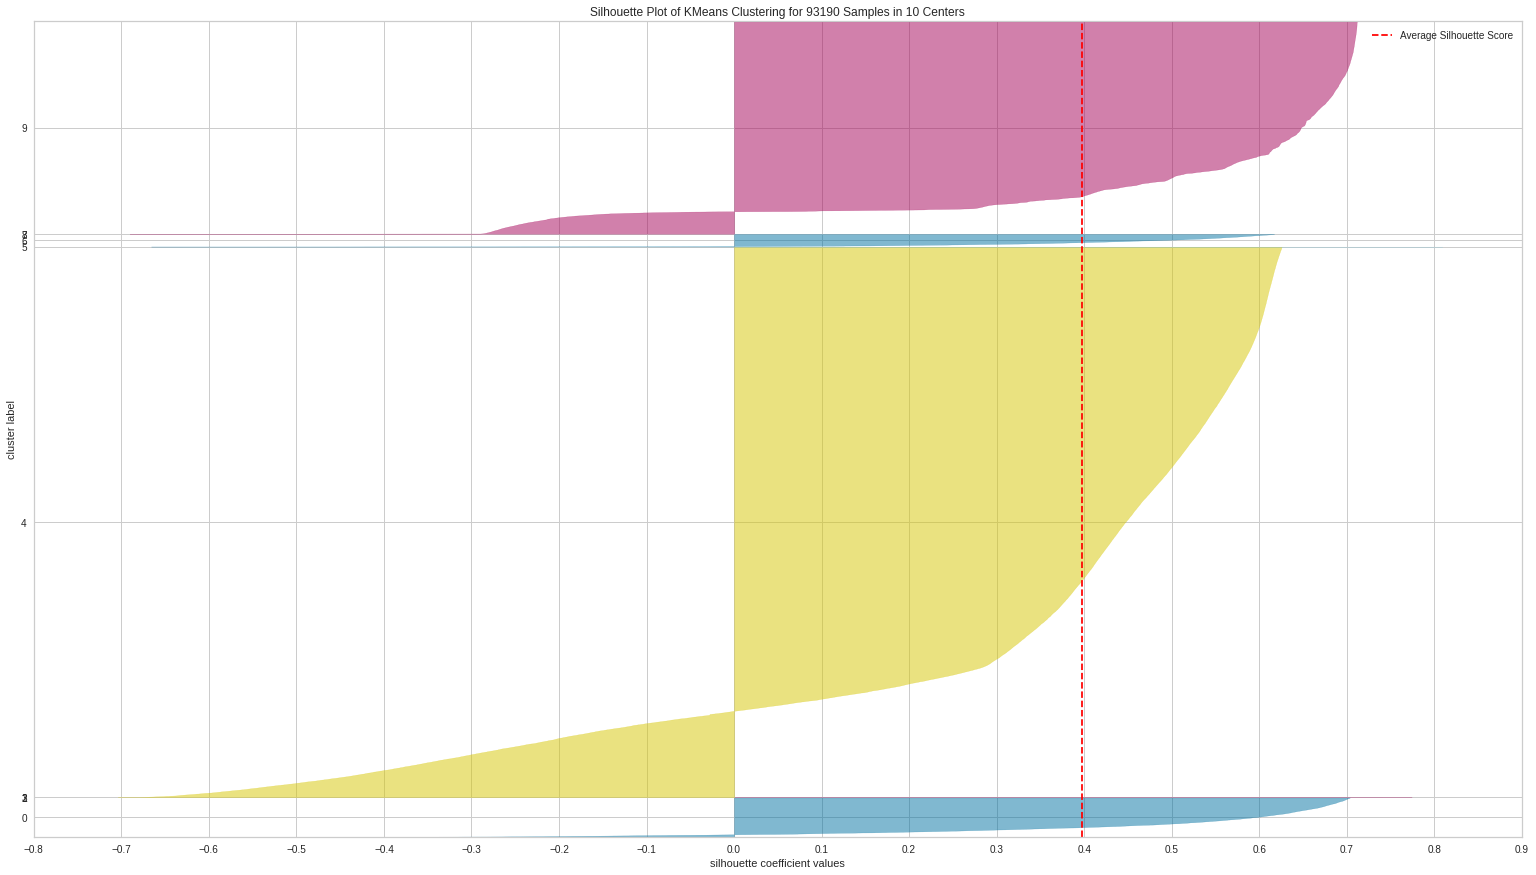

In [ ]:
visualizer = SilhouetteVisualizer(model, size=(1920,1080),colors='yellowbrick')

visualizer.fit(test_temp.drop(columns = ['DATE']))        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


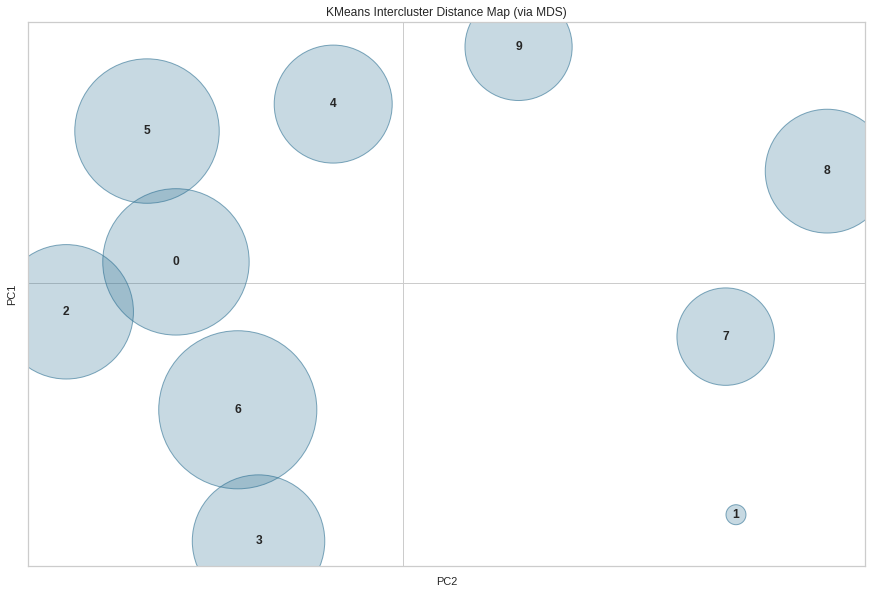

In [ ]:

visualizer = InterclusterDistance(model,size=(1080, 720),legend = 0)
visualizer.fit(test_temp.drop(columns = ['DATE'])) 
visualizer.show()